In [142]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross_validation
from sklearn.model_selection import train_test_split

In [143]:
credit = pd.read_csv("/Users/gtran/Downloads/ccclients.csv", header =1)

In [144]:
del credit['ID']

In [145]:
credit.rename(columns={'default payment next month':'default_target'}, inplace=True)

In [146]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null int64
PAY_AMT6          30000 non-null 

In [147]:
#features
features = credit.iloc[:,11:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [148]:
#dependent variable
depVar = credit['default_target']

In [149]:
#Training Set (Feature Space: X Training)
X_train = (features[: 2250])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [150]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 2250]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 2250


0    1
1    1
2    0
3    0
4    0
Name: default_target, dtype: int64

In [151]:
#Testing Set (X Testing)
X_test = features[-750:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 750
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29250      18885      21563      20943      20152      19754      19204   
29251      17927      17384      13648      13924      15685      15292   
29252      38815      40171      37274      30203      30809      33323   
29253      47410      48705      46776      48218      41037       9288   
29254      49007      48847      47241      47683      46844      47537   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29250      3300         0         0         2       384      2488  
29251      1500      1500      1400      2000         0      2500  
29252      2023      1491      2000      1092      3000      1353  
29253      2100      2000      2300      2100       470       350  
29254      1922      2200      2000      1400      2000      2270  


In [152]:
#Ground Truth (y_test) 
y_test = depVar[-750:]
y_test_count = len(y_test.index)
print('The number of observations in the Y testing set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 750


29250    1
29251    0
29252    0
29253    0
29254    1
Name: default_target, dtype: int64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [154]:
X_train.shape, X_test.shape

((1687, 12), (563, 12))

In [155]:
#dependent variable
print(depVar.head())

0    1
1    1
2    0
3    0
4    0
Name: default_target, dtype: int64


In [162]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
score = rf.score(X_test,y_test)
print('Accuracy: %.3f RandomForestClassifier' % score)

gb = GradientBoostingClassifier(random_state=1,n_estimators=10,max_depth=4)
gb.fit(X_train,y_train)
score = gb.score(X_test,y_test)
print('Accuracy: %.3f GradientBoostingClassifier' % score)

dt = DecisionTreeClassifier(random_state=1,max_leaf_nodes=3)
dt.fit(X_train,y_train)
score = dt.score(X_test,y_test)
print('Accuracy: %.3f DecisionTreeClassifier' % score)

Accuracy: 0.767 RandomForestClassifier
Accuracy: 0.780 GradientBoostingClassifier
Accuracy: 0.783 DecisionTreeClassifier


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Optimal number of features : 9


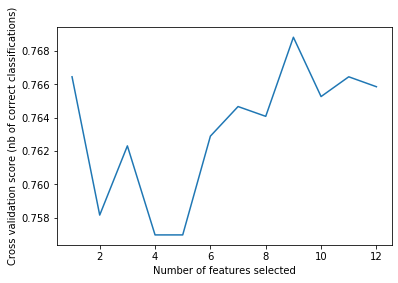

In [166]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

gb = GradientBoostingClassifier(random_state=1)
rfecv = RFECV(estimator=gb, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [167]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[4,6,8,10,12,14], 'max_depth':[2,4,6,8,10]}
gb = GradientBoostingClassifier(random_state=1)
clf = GridSearchCV(gb, parameters)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
clf.best_params_

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 4, 'n_estimators': 6}

In [173]:
#Final model: Gradient Boosting
gb = GradientBoostingClassifier(random_state=1,max_depth=4,n_estimators=6)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)


0.783303730017762

In [177]:
from sklearn.metrics import cohen_kappa_score

y_pred = gb.predict(X_test)
cohen_kappa_score(y_test, y_pred)

0.0

Index(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')
Feature ranking:
1. feature 7 (0.191731)
2. feature 6 (0.141495)
3. feature 3 (0.105294)
4. feature 1 (0.101214)
5. feature 5 (0.098508)
6. feature 8 (0.094534)
7. feature 9 (0.074201)
8. feature 0 (0.046241)
9. feature 2 (0.042050)
10. feature 10 (0.038657)
11. feature 4 (0.036071)
12. feature 11 (0.030004)


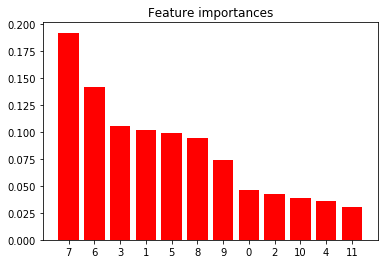

In [191]:
importances = gb.feature_importances_
std = np.std([gb.feature_importances_ for tree in gb.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(X_train.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()